In [9]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add a column to distinguish country
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine all datasets into one DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

Boxplots for GHI, DNI, DHI

C:\Users\fikre\AppData\Local\Temp\ipykernel_23460\1830438785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")


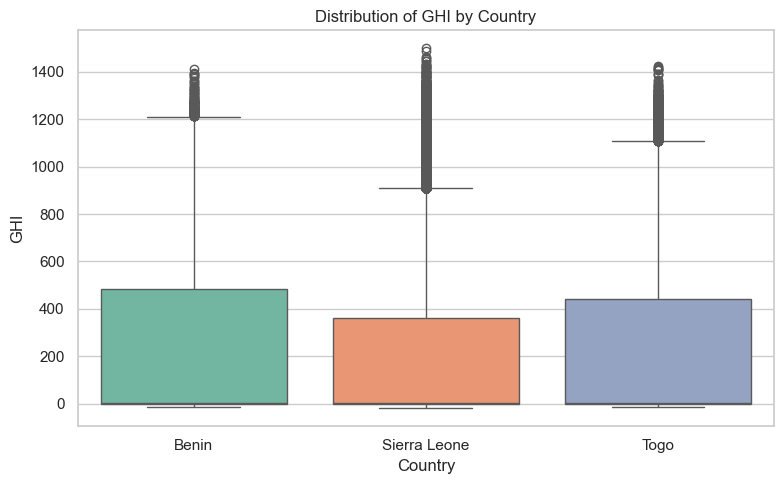

C:\Users\fikre\AppData\Local\Temp\ipykernel_23460\1830438785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")


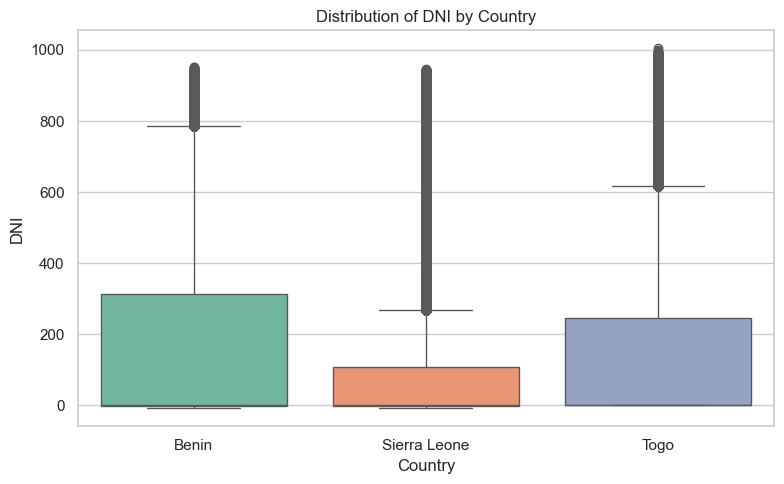

C:\Users\fikre\AppData\Local\Temp\ipykernel_23460\1830438785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")


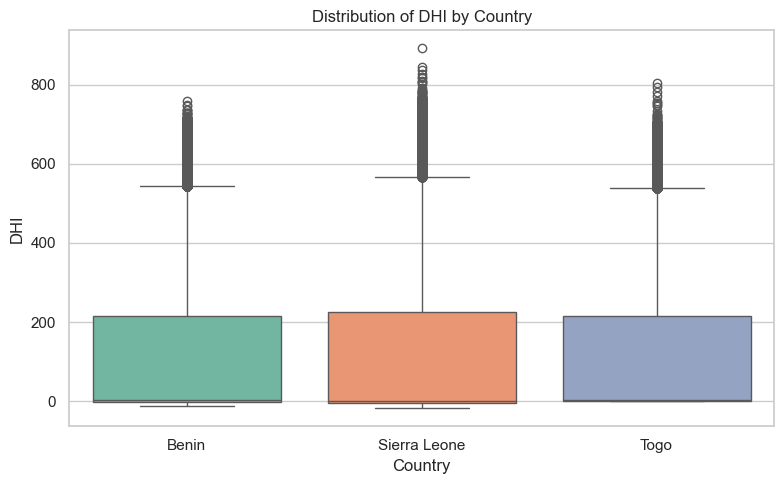

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=df_all, palette="Set2")
    plt.title(f"Distribution of {metric} by Country")
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.tight_layout()
    plt.show()

Summary Table (Mean, Median, Std Dev)

In [11]:
summary_stats = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary_stats.columns = ["_".join(col) for col in summary_stats.columns]
summary_stats.reset_index(inplace=True)
summary_stats

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.559452,1.8,331.131327,167.187516,-0.1,261.710501,115.358961,1.6,158.691074
1,Sierra Leone,201.957515,0.3,298.495150,116.376337,-0.1,218.652659,113.720571,-0.1,158.946032
2,Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


One-Way ANOVA

In [12]:
from scipy.stats import f_oneway

ghi_benin = benin["GHI"].dropna()
ghi_sierra = sierra_leone["GHI"].dropna()
ghi_togo = togo["GHI"].dropna()

# Perform one-way ANOVA
f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 2090.09
P-value: 0.0000


Bar chart ranking countries by average GHI

C:\Users\fikre\AppData\Local\Temp\ipykernel_23460\3034540260.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


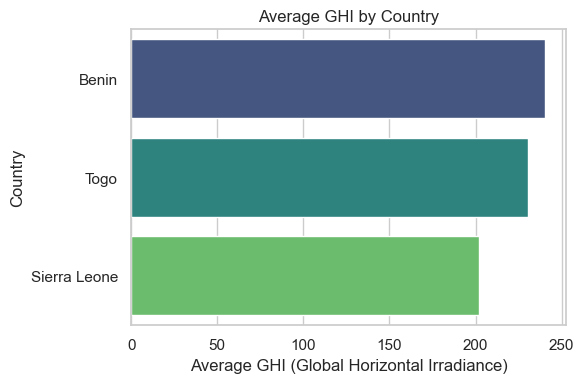

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average GHI per country
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
plt.title("Average GHI by Country")
plt.xlabel("Average GHI (Global Horizontal Irradiance)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Key Observations

- **Benin** shows the **highest average Global Horizontal Irradiance (GHI)** among the three countries, indicating the strongest solar potential overall.
- Despite similar DHI (Diffuse Horizontal Irradiance) values across countries, **DNI (Direct Normal Irradiance)** varies more significantly — with **Benin leading**, followed by **Togo**, and **Sierra Leone** trailing.
- The **ANOVA test (F = 2090.09, p = 0.0000)** confirms that the differences in GHI between countries are statistically significant, supporting the reliability of these observations.
